## Task Description

Write a Python function that takes as input a dataset containing various patient features (such as age, gender, blood pressure, cholesterol levels, etc.) and the presence or absence of a particular disease. Implement a machine learning model that can accurately predict the likelihood of a patient developing the disease based on their features.

## Steps to Follow

1. Import the necessary libraries and modules.
2. Load the dataset into a pandas DataFrame.
3. Preprocess the data (e.g., handle missing values, encode categorical variables, etc.).
4. Split the dataset into training and testing sets.
5. Choose a machine learning algorithm suitable for the task (e.g., logistic regression, random forest, etc.).
6. Train the model using the training data.
7. Evaluate the model's performance using appropriate metrics (e.g., accuracy, precision, recall, etc.).
8. Fine-tune the model if necessary (e.g., hyperparameter tuning).
9. Test the final model using the testing data.
10. Analyze the results and interpret the model's predictions.

## Conclusion

By following these steps, you can develop a machine learning model that accurately predicts the likelihood of a patient developing a particular disease based on their features. Remember to document your code and findings for future reference.

In [47]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score 
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns

In [2]:
data = pd.read_csv('cardio_train.csv',sep=';')
data.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


In [3]:
data.describe()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
count,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000
mean,49972.419900,19468.865814,1.349571,164.359229,74.205690,128.817286,96.630414,1.366871,1.226457,0.088129,0.053771,0.803729,0.499700
std,28851.302323,2467.251667,0.476838,8.210126,14.395757,154.011419,188.472530,0.680250,0.572270,0.283484,0.225568,0.397179,0.500003
min,0.000000,10798.000000,1.000000,55.000000,10.000000,-150.000000,-70.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,25006.750000,17664.000000,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,50001.500000,19703.000000,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,74889.250000,21327.000000,2.000000,170.000000,82.000000,140.000000,90.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,99999.000000,23713.000000,2.000000,250.000000,200.000000,16020.000000,11000.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000


In [5]:
# Convert age from days to years
data['age_years'] = data['age'] / 365

# Drop the original 'age' column
data.drop(columns=['age'], inplace=True)

In [7]:
# Standrdization 
scaler = StandardScaler()
scaler.fit(data)
data_scaled = scaler.transform(data)

# Creating a new DataFrame with scaled data
data_scaled_df = pd.DataFrame(data_scaled, columns=data.columns)
data_scaled_df.head()

,id,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,age_years
0,-1.732080,1.364055,0.443452,-0.847873,-0.122182,-0.088238,-0.539322,-0.39572,-0.310879,-0.238384,0.494167,-0.9994,-0.436062
1,-1.732046,-0.733108,-1.018168,0.749831,0.072610,-0.035180,2.400793,-0.39572,-0.310879,-0.238384,0.494167,1.0006,0.307686
2,-1.732011,-0.733108,0.078047,-0.708942,0.007679,-0.141297,2.400793,-0.39572,-0.310879,-0.238384,-2.023607,1.0006,-0.247997
3,-1.731976,1.364055,0.565254,0.541435,0.137541,0.017879,-0.539322,-0.39572,-0.310879,-0.238384,0.494167,1.0006,-0.748152
4,-1.731942,-0.733108,-1.018168,-1.264666,-0.187113,-0.194356,-0.539322,-0.39572,-0.310879,-0.238384,-2.023607,-0.9994,-0.808543


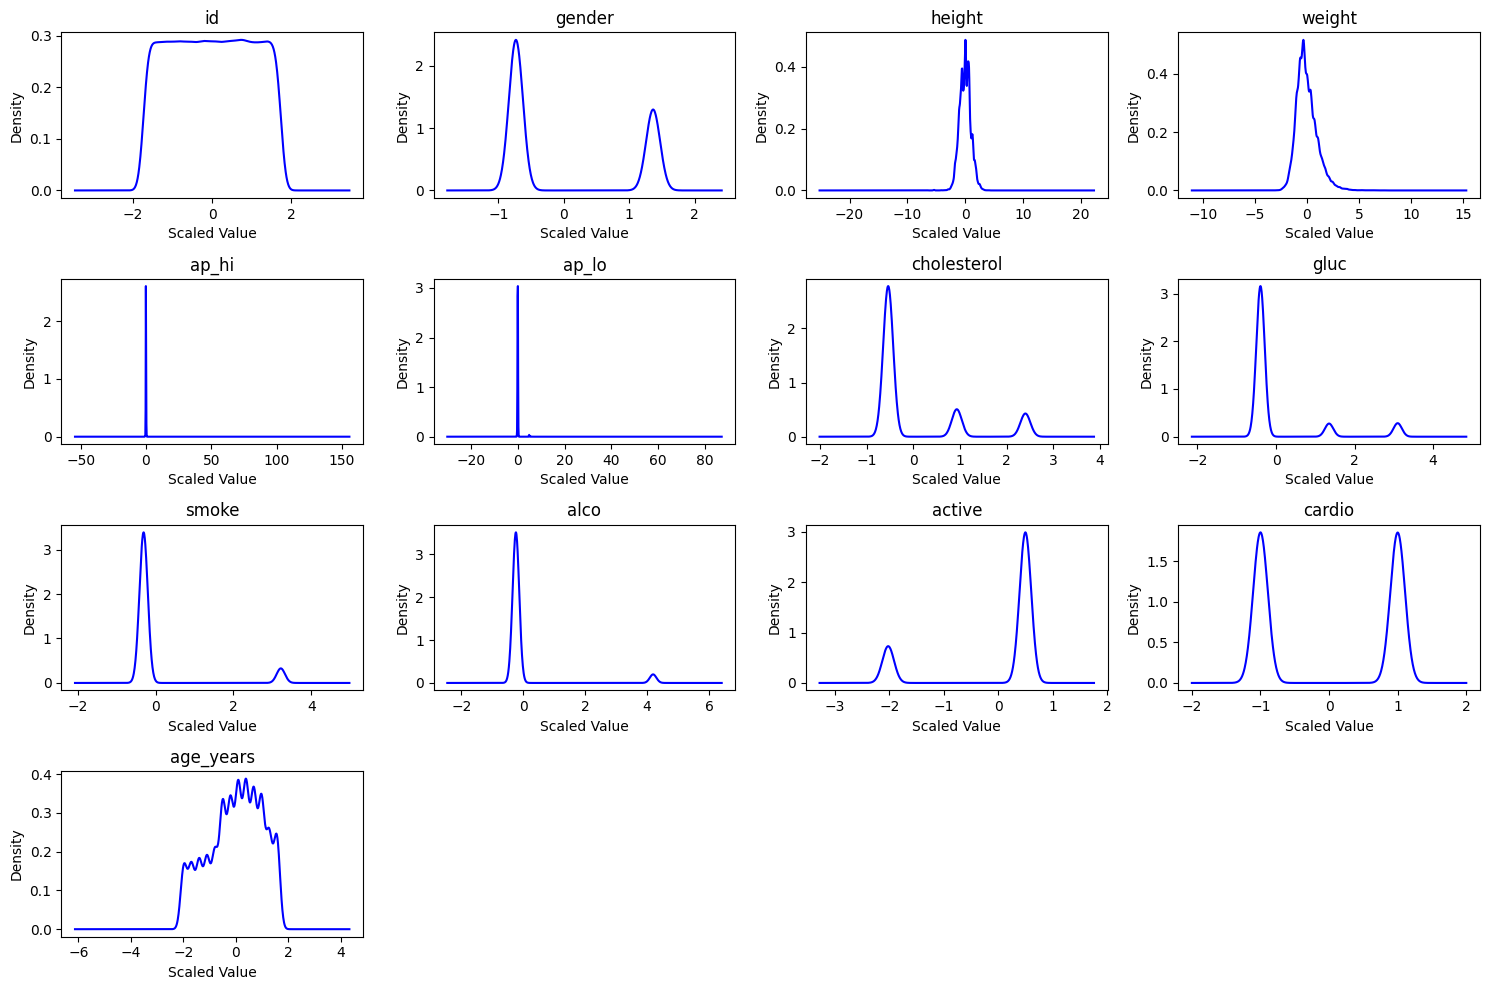

In [8]:
plt.figure(figsize=(15, 10))
for ii, name in enumerate(data_scaled_df.columns):
    plt.subplot(4, 4, ii + 1) 
    data_scaled_df[name].plot(kind='density', color='blue', label=name)
    plt.title(name)
    plt.xlabel('Scaled Value')
    plt.ylabel('Density')

plt.tight_layout()  
plt.show()

In [14]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import mutual_info_classif 
from sklearn.preprocessing import LabelEncoder
from sklearn import metrics 

# Separate features (X) and target variable (y)
X = data_scaled_df.drop(columns=['cardio'])
y = data_scaled_df['cardio']

# Convert 'cardio' to categorical labels
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

# Compute mutual information scores for each feature
mutual_info_scores = mutual_info_classif(X, y)

# Create a DataFrame to store feature names and their corresponding scores
feature_scores_df = pd.DataFrame({'Feature': X.columns, 'Mutual Information Score': mutual_info_scores})

# Sort the DataFrame by mutual information scores in descending order
feature_scores_df = feature_scores_df.sort_values(by='Mutual Information Score', ascending=False)

# Print the sorted DataFrame
print(feature_scores_df)

        Feature  Mutual Information Score
4         ap_hi                  0.118654
5         ap_lo                  0.075963
11    age_years                  0.031043
6   cholesterol                  0.027107
3        weight                  0.016221
7          gluc                  0.005616
1        gender                  0.004801
10       active                  0.002846
8         smoke                  0.002357
0            id                  0.000815
9          alco                  0.000795
2        height                  0.000000


This Python code uses the Scikit-learn library to perform feature selection on a dataset. The goal is to identify the most informative features for predicting the target variable 'cardio'.

The code imports necessary modules, including `SelectKBest` and `mutual_info_classif` for feature selection, `LabelEncoder` for converting categorical labels, and `metrics` for evaluating model performance.

The dataset is divided into features (X) and the target variable (y). Features are all columns in the `data_scaled_df` dataframe except 'cardio', and the target variable is 'cardio'.

The target variable 'cardio' is converted into numerical labels using `LabelEncoder` because many machine learning algorithms require numerical input.

Next, mutual information scores are computed for each feature. Mutual information measures the dependency between two variables. Higher scores indicate more information about the target variable.

A DataFrame is created to store feature names and their mutual information scores. The DataFrame is sorted in descending order of mutual information scores, showing the most informative features at the top.

Finally, the sorted DataFrame is printed to the console, revealing the features most informative about the target variable based on their mutual information scores.


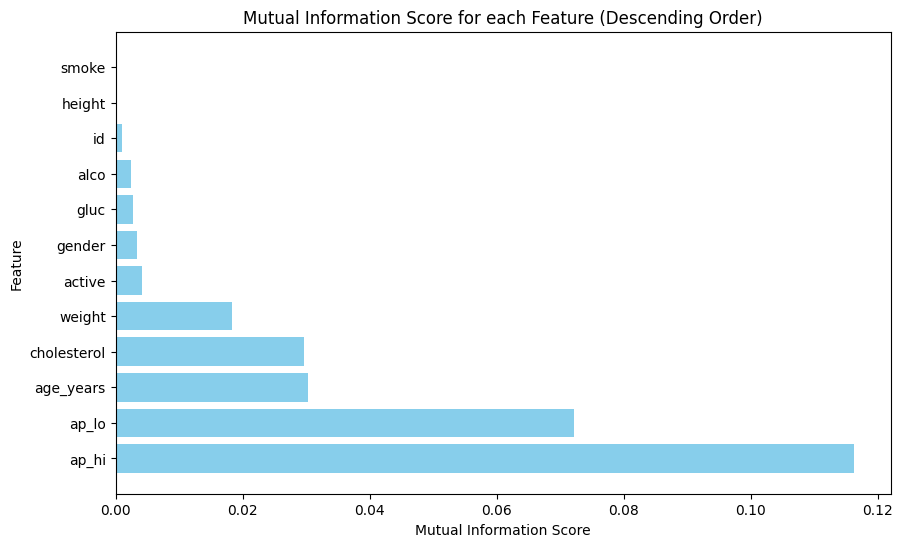

In [10]:
# Plot the features and their mutual information scores
plt.figure(figsize=(10, 6))
plt.barh(feature_scores_df['Feature'], feature_scores_df['Mutual Information Score'], color='skyblue')
plt.xlabel('Mutual Information Score')
plt.ylabel('Feature')
plt.title('Mutual Information Score for each Feature (Descending Order)')
plt.show()

In [12]:
# tarining and testing part 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)
print("Train data shape: ", X_train.shape, y_train.shape)
print("Test data shape: ", X_test.shape, y_test.shape)

# Feature Scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

Train data shape:  (56000, 12) (56000,)
Test data shape:  (14000, 12) (14000,)


In [16]:
# Select the top 5 features
k = 5  

# Initialize SelectKBest with mutual information score
selector = SelectKBest(score_func=mutual_info_classif, k=k)

# Fit selector to training data
selector.fit(X, y)

# Get selected feature indices
selected_indices = selector.get_support(indices=True)

# Get names of selected features
selected_features = X.columns[selected_indices]

print("Selected features:", selected_features)

Selected features: Index(['weight', 'ap_hi', 'ap_lo', 'cholesterol', 'age_years'], dtype='object')


In [17]:
from sklearn.model_selection import train_test_split
X_selected = X[selected_features]
X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.25, random_state=42)
print(X_train.shape)

(52500, 5)


In [18]:
from sklearn.svm import LinearSVC

# Establish a linear SVM model
Lsvm = LinearSVC(penalty='l2', C=1.0, random_state=1)

# Train the model
Lsvm.fit(X_train, y_train)

c:\Users\hp\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
c:\Users\hp\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


LinearSVC(random_state=1)

In [19]:
from sklearn.metrics import accuracy_score

# Use the trained model to make predictions
y_pred = Lsvm.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.6779428571428572


In [20]:
from sklearn import svm
# Establish non-linear SVM model
rbfsvm = svm.SVC(kernel='rbf', gamma=0.06, random_state=1)
# Train the model
rbfsvm.fit(X_train, y_train)

SVC(gamma=0.06, random_state=1)

In [26]:
# Use the trained model to make predictions
rbf_y_pred = rbfsvm.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, rbf_y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.7302285714285714


In [27]:
# acurecy, presion, recall and f1 score
def evaluate_model(y_test, y_pred):
    # Calculate model performance
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    return accuracy, precision, recall, f1

In [29]:
# print the results
accuracy, precision, recall, f1 = evaluate_model(y_test, y_pred)
print("Model Performance:")
print("Accuracy: ", accuracy)
print("Precision: ", precision)
print("Recall: ", recall)
print("F1 Score: ", f1)

Model Performance:
Accuracy:  0.6779428571428572
Precision:  0.6952779144121988
Recall:  0.6416250567408079
F1 Score:  0.6673748819641171


In [33]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier 
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import VotingClassifier

model1=KNeighborsClassifier(n_neighbors=50)
model2=LogisticRegression()
model3=SVC(kernel="rbf",C=1)
model4=RandomForestClassifier(n_estimators=500)

T1=("knn",model1)
T2=("lgr",model2)
T3=("svm",model3)
T4=("rf",model4)

model=VotingClassifier(estimators=[T1,T2,T3,T4],voting="hard")

In [35]:
model.fit(X_train,y_train)

VotingClassifier(estimators=[('knn', KNeighborsClassifier(n_neighbors=50)),
                             ('lgr', LogisticRegression()), ('svm', SVC(C=1)),
                             ('rf', RandomForestClassifier(n_estimators=500))])

In [37]:
y_pred=model.predict(X_test)

In [43]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,y_pred)

array([[6842, 1846],
       [2966, 5846]], dtype=int64)

In [44]:
accuracy_score(y_test,y_pred)

0.7250285714285715

In [46]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.70      0.79      0.74      8688
           1       0.76      0.66      0.71      8812

    accuracy                           0.73     17500
   macro avg       0.73      0.73      0.72     17500
weighted avg       0.73      0.73      0.72     17500

